In [36]:
import numpy as np
import pandas as pd
import dtw
import warnings
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
warnings.filterwarnings('ignore')

In [20]:
dirr = 'C:/Users/shic/Desktop/shinhan_simon/google_drive/crawler_data/'
#dirr = 'C:/Users/rsh15/Google Drive/crawler_data/'

In [21]:
kbland = pd.read_csv(dirr + 'kbland/RAA_KB부동산매매전세가격지수_수정_유승훈.csv')
court  = pd.read_csv(dirr + 'court/RAA_법원경매통계_유승훈.csv')

In [22]:
kb_df = kbland.groupby(['BASE_YM','SIDONM'],as_index=False)[
    ['TRDE_PRICE_CHNG_RT','TRDE_PRICE_INDX','TRDE_DEAL_INDX','BUY_ADVAN_INDX']].mean()
kb_df

,BASE_YM,SIDONM,TRDE_PRICE_CHNG_RT,TRDE_PRICE_INDX,TRDE_DEAL_INDX,BUY_ADVAN_INDX
0,190001,경상북도,9999.000000,9999.000000,9999.000,9999.000
1,201102,강원도,0.250000,76.133333,0.000,0.000
2,201102,경기도,0.123488,91.160465,30.600,47.200
3,201102,경상남도,0.408182,98.827273,0.000,0.000
4,201102,경상북도,0.091667,84.066667,0.000,0.000
...,...,...,...,...,...,...
2121,202106,전라남도,0.160000,104.712500,17.675,50.625
2122,202106,전라북도,0.309500,102.160000,30.875,106.425
2123,202106,제주특별자치도,0.722500,103.750000,6.975,122.075
2124,202106,충청남도,0.269722,106.244444,25.550,109.800


In [23]:
kb_df['BASE_YM'] = pd.to_datetime(kb_df['BASE_YM'],format='%Y%m')
kb_df = kb_df[kb_df['BASE_YM']>'2011-12-31']

In [24]:
court_df = court.groupby(['BASE_YM','SIDONM'],as_index=False).agg({
    'ACTN_ITMN':'sum','DISP_ITMN':'sum',
    'ESTM_PRICE':'sum','DISP_PRICE':'sum',
    'DISP_RT':'mean','DISP_VLUE_RT':'mean'
})
court_df

,BASE_YM,SIDONM,ACTN_ITMN,DISP_ITMN,ESTM_PRICE,DISP_PRICE,DISP_RT,DISP_VLUE_RT
0,201201,강원도,2392.0,722.0,1.116931e+11,8.302414e+10,0.172500,0.304175
1,201201,경기도,9963.0,2597.0,9.282539e+11,6.086796e+11,0.170500,0.309623
2,201201,경상남도,3463.0,1038.0,1.600930e+11,1.013838e+11,0.201057,0.333336
3,201201,경상북도,3294.0,1397.0,1.343501e+11,9.330110e+10,0.221689,0.365502
4,201201,광주광역시,1289.0,360.0,6.448932e+10,4.619705e+10,0.253158,0.464568
...,...,...,...,...,...,...,...,...
1950,202107,전라남도,1877.0,716.0,6.482616e+10,5.548129e+10,0.196053,0.372086
1951,202107,전라북도,1044.0,470.0,8.158872e+10,6.179268e+10,0.219740,0.320322
1952,202107,제주특별자치도,460.0,220.0,8.941773e+10,6.398617e+10,0.369816,0.428947
1953,202107,충청남도,1883.0,720.0,1.860826e+11,1.241788e+11,0.173421,0.248477


In [25]:
court_df['BASE_YM'] = pd.to_datetime(court_df['BASE_YM'],format='%Y%m')
court_df = court_df[court_df['BASE_YM']<'2021-07-01']

In [26]:
kb_cols = kb_df.columns.values.tolist()[2:]
court_cols = court_df.columns.values.tolist()[2:]

In [32]:
print(kb_cols)
print(court_cols)

['TRDE_PRICE_CHNG_RT', 'TRDE_PRICE_INDX', 'TRDE_DEAL_INDX', 'BUY_ADVAN_INDX']
['ACTN_ITMN', 'DISP_ITMN', 'ESTM_PRICE', 'DISP_PRICE', 'DISP_RT', 'DISP_VLUE_RT']


In [31]:
regions = ['강원도','경기도','경상남도','경상북도','광주광역시','대구광역시','대전광역시','부산광역시','서울특별시','세종특별자치시','울산광역시',
           '인천광역시','전라남도','전라북도','제주특별자치도','충청남도','충청북도']

In [37]:
for rr in regions:
    kb_df_tmp = kb_df[kb_df['SIDONM']==rr]
    court_df_tmp = court_df[court_df['SIDONM']==rr]
    
    for court_col in court_cols:
        sns.lineplot(x=kb_df_tmp['BASE_YM'],y=kb_df_tmp['TRDE_PRICE_INDX'])
        sns.lineplot(x=court_df_tmp['BASE_YM'],y=court_df_tmp[court_col])

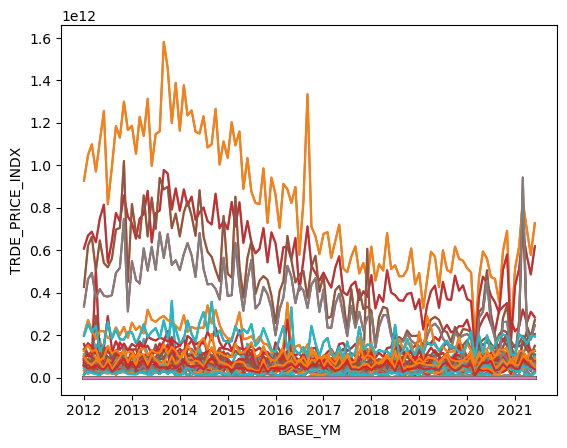

In [42]:
kb_df_tmp['TRDE_PRICE_INDX']

204     102.435714
221     102.807143
238     103.210714
255     103.511429
272     103.803571
           ...    
2057    100.776190
2074    101.434286
2091    102.410714
2108    103.668571
2125    104.842857
Name: TRDE_PRICE_INDX, Length: 114, dtype: float64